### Ex 1
fit the sigmoid curve and calculate decision boundary using given dataset

a cheat sheet:

in an optimization loop
first calculate hypothesis for each datapoint x in X: $h = \frac{1}{1 + exp(-\theta_0-\theta_1*x)}$
then calculate crossentropy: $-y\cdot log(h) - (1-y)\cdot log(1-h)$
and cost: $\frac{sum(crossentropy)}{len(x)}$

next calculate derivatives for $\theta_0$ and $\theta_1$ (similar to those in linear regression)
$\theta_0\_deriv = \frac{sum(h - y)}{len(y)}, \theta_1\_deriv = sum((h-y)*X)$
and then update theta weights
$\theta = \theta - lr*\theta\_deriv$

check if cost is getting lower through iterations
if not, try to modify the learning rate

calculating decision boundary might look like this:

$\theta[0] + \theta[1]*x = 0$

$\theta[1]*x = -\theta[0]$

$x = \frac{-\theta[0]}{\theta[1]}$

the result might look like below

In [1]:
from matplotlib import pyplot as plt
import numpy as np

X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1,  1,  1],
              [1, 2, 3, 4, 5, 6, 7, 8, 9, 15, 25]], dtype=np.float32)
y = np.array([[0, 0, 0, 0, 0, 0, 1, 1, 1,  1,  1]], dtype=np.float32)


theta = np.array([0.,0.])

#### optimization loop

In [2]:
max_iter = 10000
alpha = 0.1

def computeCost(x_compute_cost, y_compute_cost, theta_compute_cost):
    h_compute_cost = 1 / (1 + np.exp(-x_compute_cost@theta_compute_cost.T))
    crossentropy_compute_cost = -y_compute_cost.T*np.log(h_compute_cost + 0.00001) - \
                                (1 - y_compute_cost.T)*\
                                np.log(1 - h_compute_cost + 0.00001)
    cost_compute_cost = sum(crossentropy_compute_cost.T) / len(x_compute_cost)
    return cost_compute_cost

def gradient_prosty(x_grad, y_grad, theta_grad, alpha_grad, it_grad, eps=0.00001):
    cost_grad = list()
    cost_grad.append(computeCost(x_grad, y_grad, theta_grad))
    for _ in range(it_grad):
        for i in range(theta_grad.shape[0]):
            h = 1 / (1 + np.exp(-x_grad@theta_grad.T))
            diff = np.array([d1 - d2 for d1, d2 in zip(h, y_grad)])
            theta_grad[i] -= alpha_grad * diff.T @ x_grad[:,i]/len(y_grad)
        cost_grad.append(computeCost(x_grad, y_grad, theta_grad))
        if np.abs(cost_grad[-2] - cost_grad[-1]) < eps:
            break
    return theta_grad, cost_grad


In [3]:
theta_opt, cost = gradient_prosty(X.T, y.T, theta, alpha, max_iter)

print(theta_opt)


[-9.85292053  1.54052544]


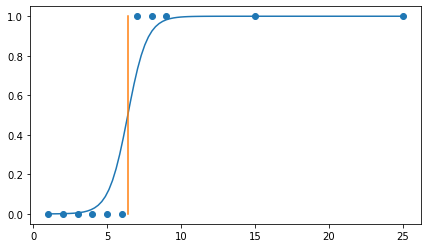

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(7,4))
ax.scatter(X[1], y)

x_samples = np.ones((X.shape[0], 100))
x_tmp = np.linspace(min(X[1,:]), max(X[1,:]), 100)
x_samples[1] = x_tmp
y_samples = 1 / (1 + np.exp(-x_samples.T@theta_opt))

x_split = -theta_opt[0]/theta_opt[1]

ax.plot(x_tmp, y_samples)
ax.plot(np.linspace(x_split, x_split, 10), np.linspace(0,1,10))

### Ex2

generalize optimization code for X being a matrix, where its rows are features and columns are examples
code should work independently from number of features and number of examples
use matrix multiplication (np.matmul or @)
plot decision boundary on a plot x2(x1)
calculating decision boundary might look like this:

$\theta_0 + \theta_1x_1 + \theta_2x_2 = 0$

$\theta_2x_2 = -\theta_0 - \theta_1x_1$

$x_2 = \frac{-\theta_0}{\theta_2} - \frac{\theta_1}{\theta_2}  x_1$

In [5]:
X = np.array([[ 1, 1, 1, 1, 1, 1, 1, 1, 1,  1,  1], # bias' 'variables' already appended to X
              [ 1, 2, 3, 4, 5, 6, 7, 8, 9, 15, 25],
              [13, 9, 8, 6, 4, 2, 1, 0, 3,  4,  2]], dtype=np.float32)
y = np.array([0, 0, 0, 0, 0, 0, 1, 1, 1,  1,  1], dtype=np.float32)

theta = np.array([0.,0.,0.])


In [6]:
theta_opt, cost = gradient_prosty(X.T, y.T, theta, alpha, max_iter)

print(theta_opt)

[-4.67052962  1.656675   -2.9740792 ]


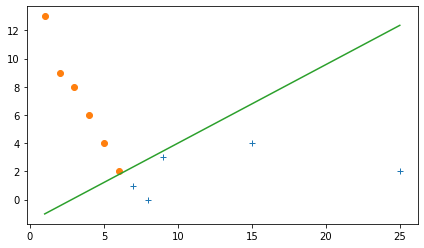

In [8]:
x1 = np.linspace(np.min(X[1, :]), np.max(X[1, :]), 100)
x2 = -theta[0]/theta[2] - theta[1]/theta[2] * x1

X_positive = X.T[y == 1,:]
X_negative = X.T[y == 0,:]

fig, ax = plt.subplots(1, 1, figsize=(7,4))
ax.plot(X_positive[:, 1], X_positive[:, 2], '+')
ax.plot(X_negative[:, 1], X_negative[:, 2], 'o')
ax.plot(x1, x2, '-')

### Ex3

using real data, optimize classifier to predict given values

split dataset into a training set and a test set
train model on the training set
calculate TP, FP, TN, FN on test set
calculate sensitivity, specificity, positive predictivity and negative predictivity

In [9]:
import pandas as pd

data = pd.read_csv('./lab-2/lab-2/data.txt')
data = data.values
data

array([[30.28671077, 43.89499752,  0.        ],
       [35.84740877, 72.90219803,  0.        ],
       [60.18259939, 86.3085521 ,  1.        ],
       [79.03273605, 75.34437644,  1.        ],
       [45.08327748, 56.31637178,  0.        ],
       [61.10666454, 96.51142588,  1.        ],
       [75.02474557, 46.55401354,  1.        ],
       [76.0987867 , 87.42056972,  1.        ],
       [84.43281996, 43.53339331,  1.        ],
       [95.86155507, 38.22527806,  0.        ],
       [75.01365839, 30.60326323,  0.        ],
       [82.30705337, 76.4819633 ,  1.        ],
       [69.36458876, 97.71869196,  1.        ],
       [39.53833914, 76.03681085,  0.        ],
       [53.97105215, 89.20735014,  1.        ],
       [69.07014406, 52.74046973,  1.        ],
       [67.94685548, 46.67857411,  0.        ],
       [70.66150955, 92.92713789,  1.        ],
       [76.97878373, 47.57596365,  1.        ],
       [67.37202755, 42.83843832,  0.        ],
       [89.67677575, 65.79936593,  1.   

In [14]:
X = np.ones((data.shape[1], data.shape[0]))
X[1:3, :] = data[:, 0:2].T

y = data[:, 2:3].T

X[1, :] = (X[1, :] - np.std(X[1, :])) / np.mean(X[1, :])
X[2, :] = (X[2, :] - np.std(X[2, :])) / np.mean(X[2, :])

theta = np.array([0.,0.,0.])

array([0., 0., 0.])

In [15]:
theta_opt, cost = gradient_prosty(X.T, y.T, theta, alpha, max_iter)

print(theta_opt)

[-6.63226072  5.37108002  5.09683459]


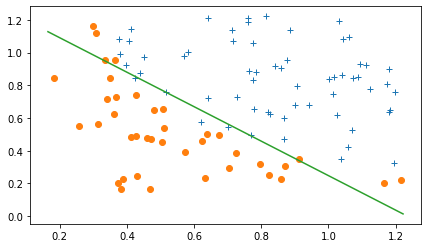

In [20]:
x1 = np.linspace(np.min(X[1, :]), np.max(X[1, :]), 100)
x2 = -theta[0]/theta[2] - theta[1]/theta[2] * x1

X_positive = X[:, y[0, :] == 1]
X_negative = X[:, y[0, :] == 0]

fig, ax = plt.subplots(1, 1, figsize=(7,4))
ax.plot(X_positive[2, :], X_positive[1, :], '+')
ax.plot(X_negative[2, :], X_negative[1, :], 'o')
ax.plot(x1, x2, '-')